In [0]:
%pylab inline

In [0]:
import dataiku
from dataiku import pandasutils as pdu

In [3]:
import pandas as pd
import datetime 
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import datetime

In [0]:
# Example: load a DSS dataset as a Pandas dataframe
mydataset = dataiku.Dataset("zeeweg")
df = mydataset.get_dataframe()

In [0]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Datum,Tijd,Aantal,Diersoort,WildType,Geslacht,...,Latitude,X,Y,Weekdatum,Year,Month,color,Day,Weekend,Daylight
0,0,0,0,279,2014-02-21,00:00:00,1,Damhert,MK,m,...,52.394451,100806.7,489921.3,2014-02-17,2014,2,black,5,weekend,N
1,1,1,1,285,2016-02-21,00:00:00,1,Damhert,HE,m,...,52.403671,98403.6,490974.3,2016-02-15,2016,2,black,0,workday,N
2,2,2,2,289,2015-01-09,00:00:00,1,Damhert,HE,m,...,52.394798,100832.3,489959.9,2015-01-05,2015,1,black,5,weekend,N
3,3,3,3,291,2016-01-15,05:05:00,1,Damhert,SP,m,...,52.397289,100371.9,490242.1,2016-01-11,2016,1,black,5,weekend,N
4,4,4,4,292,2016-02-12,00:00:00,1,Damhert,HE,m,...,52.401371,98650.4,490715.5,2016-02-08,2016,2,black,5,weekend,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        172 non-null    int64         
 1   Unnamed: 0.1      172 non-null    int64         
 2   Unnamed: 0.1.1    172 non-null    int64         
 3   Unnamed: 0.1.1.1  172 non-null    int64         
 4   Datum             172 non-null    datetime64[ns]
 5   Tijd              172 non-null    object        
 6   Aantal            172 non-null    int64         
 7   Diersoort         172 non-null    object        
 8   WildType          161 non-null    object        
 9   Geslacht          162 non-null    object        
 10  Doodsoorzaak      172 non-null    object        
 11  Longitude         172 non-null    float64       
 12  Latitude          172 non-null    float64       
 13  X                 172 non-null    float64       
 14  Y                 172 non-

In [0]:
#get weekday 
def get_weekday(day):
    return day.strftime("%w")

df['Day'] = df['Datum'].apply(get_weekday)

In [0]:
#weekend or workday
def weekend(day):
    if day == '5' or day == '6':
        return 'weekend'
    return 'workday'

df['Weekend'] = df['Day'].apply(weekend)

In [0]:
#distribution weekend / week 
df.Weekend.value_counts()

workday    124
weekend     48
Name: Weekend, dtype: int64

In [0]:
#get hour
df['hour']=df['Tijd'].apply(lambda x: x[:2])

In [0]:
#get hour 
hour = df.hour

In [0]:
#remove 00:00 time
hour = hour.value_counts()[1:]

In [0]:
len(df.Tijd.value_counts()[1:])

75

In [0]:
df.Tijd.value_counts()

00:00:00    83
18:00:00     4
04:25:00     2
02:48:00     2
07:35:00     2
            ..
01:15:00     1
23:14:00     1
01:29:00     1
03:55:00     1
23:00:00     1
Name: Tijd, Length: 76, dtype: int64

In [0]:
chisquare(hour)

Power_divergenceResult(statistic=38.0, pvalue=0.008855583856125122)

In [0]:
#function to get chisquare 
def pearsonChiScuare(df, exp=None):
   

    #tijd = df[df['Tijd'] != '00:00:00']
    #group = tijd.Daylight.value_counts()
    #group = df.Day
    #group = group.value_counts()
    
    
    df = len(group) - 1
    
    if exp ==None:
        minE = sum(group)/ len(group)
        chiVal, pval = chisquare(group)
    else:
        minE = min(exp)
        chiVal, pval = chisquare(group, exp)
    
    warning = None
    if minE < 5:
        warning = 'Minimum expected count less than 5'
    
    return chiVal, pval, df, minE, warning

In [0]:
pearsonChiScuare(df)

(7.151162790697674, 0.30709382611051383, 6, 24.571428571428573, None)

In [0]:
df.to_excel("zeeweg.xlsx")

In [0]:
df.Weekend.value_counts()

workday    124
weekend     48
Name: Weekend, dtype: int64

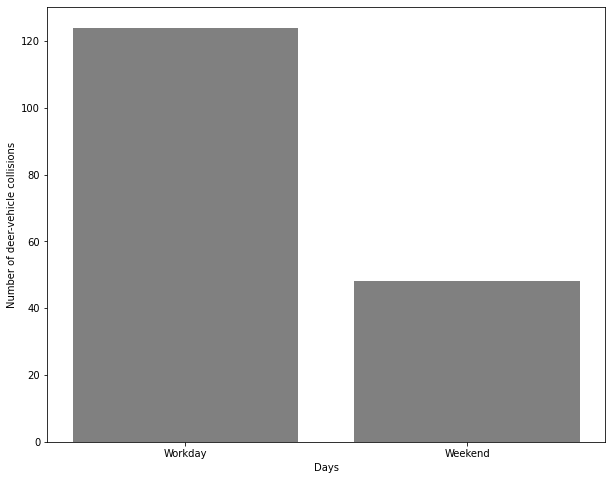

<Figure size 432x288 with 0 Axes>

In [0]:
height = [124, 48]

bars = ['Workday', 'Weekend']
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
x_pos = [0,1]
 
# Create bars
plt.bar(x_pos, height, color='grey')
 
# Create names on the x-axis
plt.xticks(x_pos, bars)



plt.ylabel('Number of deer-vehicle collisions')
plt.xlabel("Days")
#plt.title("Number of deer-vehcile collisions from 2014-2020")
plt.gcf().set_size_inches(10, 8)
# Show graphic
plt.show()
plt.savefig("DVC_days.jpg")

In [0]:
#leave 00:00 
tijd = df[df['Tijd'] != '00:00:00']
tijd.Daylight.value_counts()

N    58
Y    30
Name: Daylight, dtype: int64

In [7]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Datum,Tijd,Aantal,Diersoort,WildType,Geslacht,Doodsoorzaak,Longitude,Latitude,X,Y,Weekdatum,Year,Month,color,Day,Weekend,Daylight
0,0,0,0,279,2014-02-21,00:00:00,1,Damhert,MK,m,aanrijding,4.59101,52.394451,100806.7,489921.3,2014-02-17,2014,2,black,5,weekend,N
1,1,1,1,285,2016-02-21,00:00:00,1,Damhert,HE,m,aanrijding,4.55553,52.403671,98403.6,490974.3,2016-02-15,2016,2,black,0,workday,N
2,2,2,2,289,2015-01-09,00:00:00,1,Damhert,HE,m,aanrijding,4.59138,52.394798,100832.3,489959.9,2015-01-05,2015,1,black,5,weekend,N
3,3,3,3,291,2016-01-15,05:05:00,1,Damhert,SP,m,aanrijding,4.58457,52.397289,100371.9,490242.1,2016-01-11,2016,1,black,5,weekend,N
4,4,4,4,292,2016-02-12,00:00:00,1,Damhert,HE,m,aanrijding,4.55920,52.401371,98650.4,490715.5,2016-02-08,2016,2,black,5,weekend,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,167,167,171,653,2019-06-11,00:00:00,1,Damhert,SP,m,aanrijding,4.56392,52.399818,98969.6,490539.4,2019-06-10,2019,6,black,2,workday,N
168,168,168,172,654,2019-02-11,19:47:00,1,Ree,GEIT,v,aanrijding,4.55330,52.404160,98252.4,491030.5,2019-02-11,2019,2,black,1,workday,N
169,169,169,173,655,2018-02-22,01:29:00,1,Damhert,NaN,NaN,aanrijding,4.57194,52.398159,99513.4,490348.5,2018-02-19,2018,2,black,4,workday,N
170,170,170,174,656,2020-01-05,18:34:00,1,Damhert,HE,m,aanrijding,4.55973,52.400570,98685.4,490626.1,2019-12-30,2020,1,red,0,workday,N


In [13]:
#get relative numbers
traffic_intensity = {2014: [12344, 11779], 2015: [12187, 11407],
                     2016: [11964, 11185], 2017: [12158, 11490],
                     2018: [12672, 12079], 2019: [12164, 11154],
                     2020: [11191, 10992]}

weekend_relative = {}
workday_relative = {}

for i in df['Year'].unique():
    weekend_relative[i] = len(df[(df['Year'] == i) & (df['Weekend'] == 'weekend')]) / traffic_intensity[i][0] * 100000 / 2   

    workday_relative[i] = len(df[(df['Year'] == i) & (df['Weekend'] == 'workday')]) / traffic_intensity[i][1] * 100000 / 5

In [14]:
#create df
df_week_workday = pd.DataFrame([weekend_relative, workday_relative])

In [0]:
#sum work vs week
workdays = sum(workday_relative.values())
weekend = sum(weekend_relative.values())

In [0]:
#create df/contingency table
df_week_workday = pd.DataFrame([weekend_relative, workday_relative])

In [21]:
#transpose dataframe
df1 = df_week_workday.T

In [23]:
df1 = df1.rename(columns={0:"Weekend", 1:'Workday'})

In [24]:
df1

,Weekend,Workday
2014,7.128970,13.074115
2016,5.516550,19.669200
2015,7.220809,16.393443
2020,3.931731,12.008734
2017,5.428524,12.445605
2018,5.208333,14.570743
2019,9.043078,31.558185


In [25]:
chisquare(df1)

Power_divergenceResult(statistic=array([ 2.76567256, 16.74154792]), pvalue=array([0.83763018, 0.01028153]))

In [28]:
#get weekday total 
weekend = df1['Weekend'].sum()
workday = df1['Workday'].sum() 

In [29]:
chisquare([weekend, workday])

Power_divergenceResult(statistic=35.6183674818318, pvalue=2.40013783008808e-09)

In [20]:
# days divided by traffic intensity
#get relative numbers
day_traffic = {}

for i in range(0, 172):
    if df.iloc[i]['Day'] > 4:
        day_traffic[i] = 1 / traffic_intensity[df.iloc[i]['Year']][0] * 100000
    else:
        day_traffic[i] = 1 / traffic_intensity[df.iloc[i]['Year']][1] * 100000


2014       2016      2015       2020       2017       2018       2019     
13.074115  19.66920  16.393443  12.008734  12.445605  14.570743  31.558185    1
7.128970   5.51655   7.220809   3.931731   5.428524   5.208333   9.043078     1
dtype: int64

In [22]:
#add to dataframe
df['Day/traffic'] = df['Unnamed: 0'].map(day_traffic)

,0,1
2014,7.128970,13.074115
2016,5.516550,19.669200
2015,7.220809,16.393443
2020,3.931731,12.008734
2017,5.428524,12.445605
2018,5.208333,14.570743
2019,9.043078,31.558185


In [0]:
#sum per days
day_traffic_year = {}

for i in df['Day'].unique():
    day = df[df['Day'] == i]
    day_traffic_year[i] = sum(day['Day/traffic'])

In [0]:
#create df/contingency table 
df_days = pd.DataFrame([day_traffic_year])